In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])


In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Similar representation
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(16, activation = 'relu', name = 'layer_1'),
    Dense(16, activation = 'relu', name = 'layer_2'),
    Dense(10, name = 'layer_3'),
    Softmax()
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
layer_3 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [3]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, kernel_size = (3, 3), padding = 'SAME',  activation = 'relu', input_shape = (28, 28, 1)), #Conv2D takes (28, 28, 1) and not (28, 28)
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax'),
])

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1296)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Build the Sequential convolutional neural network model
model_2 = Sequential([
    Conv2D(16, kernel_size = (3, 3),  activation = 'relu', input_shape = (28, 28, 1)), #Conv2D takes (28, 28, 1) and not (28, 28)
    MaxPooling2D(pool_size = (3,3)),
    Flatten(),
    Dense(10, activation = 'softmax'),
])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [18]:
# Define the model optimizer, loss function and metrics
# Sparse Categorical Crossentropy is used when the labels are integers
# Categorical Crossentropy is used when the labels are vectors
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalCrossentropy()
mae = tf.keras.metrics.MeanAbsoluteError()
model_2.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = [acc, mae]
)

In [8]:
# Print the resulting model attributes
print(model_2.loss)
print(model_2.optimizer)
print(model_2.metrics)
print(model_2.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalCrossentropy object at 0x7fb1e04c6b00>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fb1e0451ef0>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [10]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
# Print the shape of the training data
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [13]:
print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.
%matplotlib inline
train_images = train_images/255.
test_images = test_images/255.

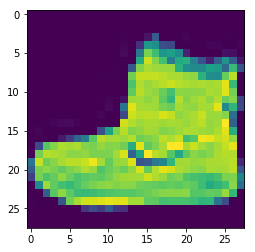

Label: 9


In [15]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print("Label: {}".format(train_labels[i]))

#### Fit the model

In [27]:
# Fit the model
# Add a dummy channel to train_images
## Verbose = 0, shows nothing 1 shows progress bar for each epoch and sample, 2, shows results only per epoch
model_2.fit(train_images[..., np.newaxis], train_labels, epochs = 2, batch_size =256, verbose = 1)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 58s 961us/sample - loss: 0.3040 - sparse_categorical_crossentropy: 0.3040 - mean_absolute_error: 4.4200
Epoch 2/2
60000/60000 [==============================] - 57s 957us/sample - loss: 0.2967 - sparse_categorical_crossentropy: 0.2967 - mean_absolute_error: 4.4200


In [16]:
history = model_2.fit(train_images[..., np.newaxis], train_labels, epochs = 8, batch_size = 256, verbose = 1)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 57s 953us/sample - loss: 0.5508 - sparse_categorical_crossentropy: 0.5508 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 52s 873us/sample - loss: 0.3618 - sparse_categorical_crossentropy: 0.3618 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 52s 867us/sample - loss: 0.3261 - sparse_categorical_crossentropy: 0.3261 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 53s 887us/sample - loss: 0.3101 - sparse_categorical_crossentropy: 0.3101 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 53s 887us/sample - loss: 0.2951 - sparse_categorical_crossentropy: 0.2951 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 54s 895us/sample - loss: 0.2881 - sparse_categorical_crossentropy: 0.2881 - mean_absolute_error: 4.4200
Epoch 7/8
6

#### Plot training history

In [17]:
# history.history is a dictionary
history.history

{'loss': [0.550831015920639,
  0.3618113673210144,
  0.3261030016740163,
  0.31006497801144917,
  0.29510008902549745,
  0.28809806133906046,
  0.27991261614163715,
  0.2757865357081095],
 'sparse_categorical_crossentropy': [0.55083084,
  0.36181122,
  0.32610306,
  0.310065,
  0.29510015,
  0.28809798,
  0.27991262,
  0.27578655],
 'mean_absolute_error': [4.4199996,
  4.42,
  4.4199996,
  4.4200006,
  4.42,
  4.4200006,
  4.4200015,
  4.4199996]}

In [18]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_crossentropy,mean_absolute_error
0,0.550831,0.550831,4.420000
1,0.361811,0.361811,4.420000
2,0.326103,0.326103,4.420000
3,0.310065,0.310065,4.420001
4,0.295100,0.295100,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

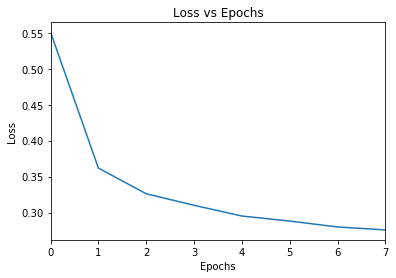

In [19]:
# Make a plot for the loss
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

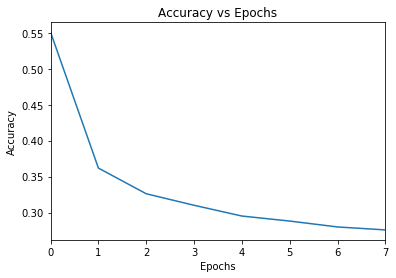

In [20]:
# Make a plot for the accuracy

acc_plot = df.plot(y = 'sparse_categorical_crossentropy', title = 'Accuracy vs Epochs', legend = False)
acc_plot.set(xlabel = 'Epochs', ylabel = 'Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

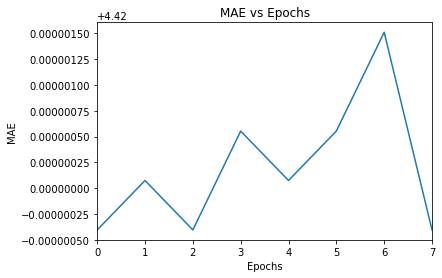

In [21]:
# Make a plot for the additional metric

mae_plot = df.plot(y = 'mean_absolute_error', title = 'MAE vs Epochs', legend = False)
mae_plot.set(xlabel = 'Epochs', ylabel = 'MAE')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [24]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model_2.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)

10000/1 - 5s - loss: 0.3082 - sparse_categorical_crossentropy: 0.3110 - mean_absolute_error: 4.4200


#### Make predictions from the model

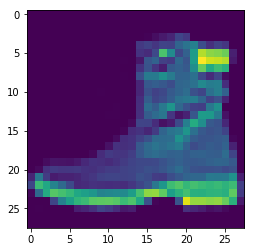

Label: Ankle boot


In [40]:
# Choose a random test image from test_images
random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print("Label: {}".format(labels[test_labels[random_idx]]))

In [43]:
# Get the model predictions
predictions = model_2.predict(test_image[np.newaxis, ..., np.newaxis])

In [44]:
print("Label : {}".format(labels[np.argmax(predictions)]))

Label : Ankle boot
